## 자료읽기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing_ml = pd.read_csv('./housing.csv')
housing_ml.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_ml.shape

(20640, 10)

## 자료정리

### 변수이름정리

In [6]:
# 원본 파일
DF0 = housing_ml.copy()
DF0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
objname = DF0.select_dtypes('object')

In [8]:
# 문자 변수 일괄 categorize
objname = DF0.select_dtypes('object').columns

for obj in objname:
    DF0[obj] = DF0[obj].astype('category')

DF0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


### 기본적인 통계량 및 시각화 확인

In [9]:
DF0.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
DF0.ocean_proximity.unique()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

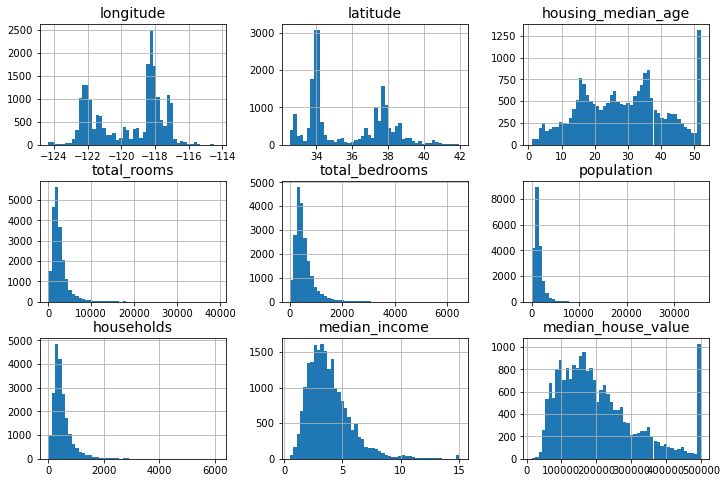

In [11]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

DF0.hist(bins=50, figsize=(12, 8))
plt.show()

- 중간소득은 달러 단위가 아님(만 달러)
- 중간 주택 연도(housing median age)와 중간 주택 가격(median house value)의 오른쪽 그래프가 심하게 높아짐 > 이상치이지 않을까?
- 특성들의 스케일이 다름
- 히스토그램의 꼬리가 두꺼움 > 정규화할 필요가 있음

### 상관계수 확인하기

In [12]:
DF0['rooms_p_household'] = DF0.total_rooms / DF0.households
DF0['bedrooms_p_room'] = DF0.total_bedrooms / DF0.total_rooms
DF0['population_p_household'] = DF0.population / DF0.households

In [13]:
corr = DF0.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688075
rooms_p_household         0.151948
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
population_p_household   -0.023737
population               -0.024650
longitude                -0.045967
latitude                 -0.144160
bedrooms_p_room          -0.255880
Name: median_house_value, dtype: float64

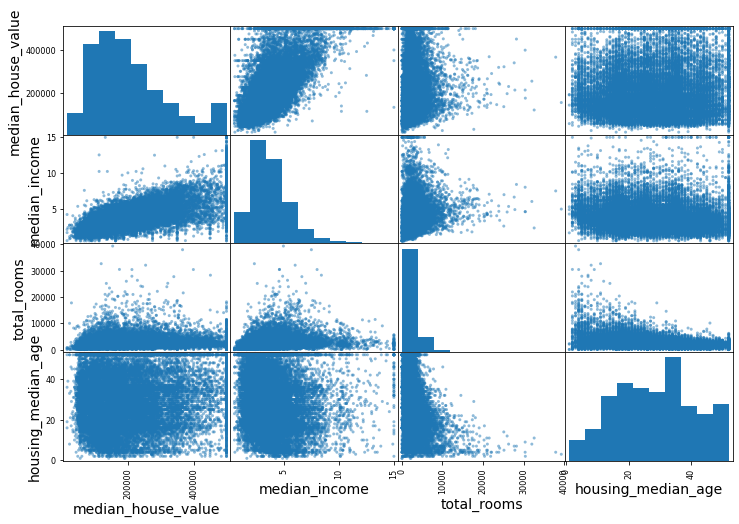

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(DF0[attributes], figsize=(12, 8))
plt.show()

In [15]:
# DF0.drop(['total_rooms', 'households', 'total_bedrooms', 'population_p_household'], axis=1, inplace=True)

## 이상치 제거

In [16]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

DFX0 = DF0.select_dtypes(np.number).copy()
DFX0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


### 결측치 가이드라인

- 10% 미만 - 삭제 / 대치
- 10 ~ 20% - Hot deck / regression / model based imputation
- 20 ~ 50% - Regression / Model based imputation
- 50% 이상 - 칼럼(변수)자체 제거

In [17]:
# 결측 확인
DFX0.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms            207
population                  0
households                  0
median_income               0
median_house_value          0
rooms_p_household           0
bedrooms_p_room           207
population_p_household      0
dtype: int64

* total_bedroooms()의 결측 확인 > 처리
* 총 20640개의 데이터 중 결측치는 207개 > 0.01, 즉 1% > 삭제나 대치를 사용

In [18]:
# total_bedrooms과 bedrooms_p_room의 결측치를 열 평균으로 맞춰주기
DFX0['total_bedrooms'].fillna(DFX0['total_bedrooms'].mean(), inplace=True)
DFX0['bedrooms_p_room'].fillna(DFX0['bedrooms_p_room'].mean(), inplace=True)

# DFX0 = DFX0.dropna(subset=["total_bedrooms"]) # 옵션 1
# housing_ml.drop("total_bedrooms", axis=1) #옵션 2
# median = housing_ml["total_bedrooms"].median() #옵션 3
# housing_ml["total_bedrooms"].fillna(median, inplace=True)

In [19]:
DFX0.isnull().sum()     # 잘 처리 되었는지 확인

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
rooms_p_household         0
bedrooms_p_room           0
population_p_household    0
dtype: int64

### one-class SVM

- nu : 포착할 이상치의 비율 대신 사용. 오염 비율로 사용 (0, 1], 모형 오차의 상한인 동시에 지지벡터비율의 하한

In [20]:
# OneClassSVM
seed = 1775
Eonesvm = svm.OneClassSVM(nu=0.02, kernel='rbf')   # nu값이 클수록, gamma값이 작을수록 이상치가 많아짐
Eonesvm.fit(DFX0)

OneClassSVM(nu=0.02)

In [21]:
# 정상치 점수: 점수가 높을수록 inliner, 점수가 낮을수록 outlier
scr_onesvm = Eonesvm.score_samples(DFX0)

{'whiskers': [<matplotlib.lines.Line2D at 0x15a096650>,
 'caps': [<matplotlib.lines.Line2D at 0x15a096cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a0964a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15a097190>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a097460>],
 'means': []}

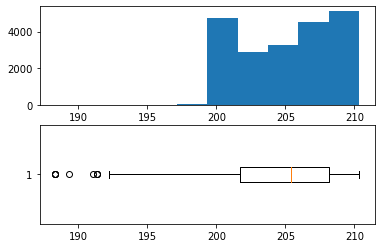

In [22]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(scr_onesvm)
ax[1].boxplot(scr_onesvm, vert=False)

In [23]:
cutoff = np.quantile(scr_onesvm, 0.02)
isin, nx = np.unique(scr_onesvm > cutoff, return_counts=True)
cutoff, isin, nx, nx / len(scr_onesvm)

(200.01554083033022,
 array([False,  True]),
 array([  413, 20227]),
 array([0.02000969, 0.97999031]))

In [24]:
# 정상 여부 예측값 {-1: outlier, 1: inliner}
ihonesvm = Eonesvm.predict(DFX0)
isin, nx = np.unique(ihonesvm, return_counts=True)
isin, nx, nx / len(ihonesvm)

(array([-1,  1]), array([  413, 20227]), array([0.02000969, 0.97999031]))

In [25]:
DFX0.iloc[ihonesvm < 0]  # 413

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,4.761658,0.231774,2.139896
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,2.929412,0.313253,4.658824
107,-118.39,34.08,27.0,6605.0,1710.0,2665.0,1520.0,3.8088,500001.0,4.345395,0.258895,1.753289
244,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,38800.0,2.927083,0.366548,4.895833
306,-118.36,34.10,52.0,1096.0,247.0,423.0,230.0,3.0179,500001.0,4.765217,0.225365,1.839130
...,...,...,...,...,...,...,...,...,...,...,...,...
20369,-114.63,32.76,15.0,1448.0,378.0,949.0,300.0,0.8585,45000.0,4.826667,0.261050,3.163333
20578,-121.81,38.84,37.0,352.0,65.0,238.0,67.0,2.8542,275000.0,5.253731,0.184659,3.552239
20610,-121.56,39.10,28.0,2130.0,484.0,1195.0,439.0,1.3631,45500.0,4.851936,0.227230,2.722096
20611,-121.55,39.10,27.0,1783.0,441.0,1163.0,409.0,1.2857,47000.0,4.359413,0.247336,2.843521


### EllipticEnvelope

- sklearn.covariance.EllipticEnvelope(contamination=0.1 ...)
- 다변량 정규 분포를 가정했을 때 이상치 포착모형

In [26]:
Eeenv = EllipticEnvelope(contamination=0.02)
Eeenv.fit(DFX0)

EllipticEnvelope(contamination=0.02)

{'whiskers': [<matplotlib.lines.Line2D at 0x15a8d9c60>,
 'caps': [<matplotlib.lines.Line2D at 0x15a8da200>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a8d9990>],
 'medians': [<matplotlib.lines.Line2D at 0x15a8da7a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a8daa70>],
 'means': []}

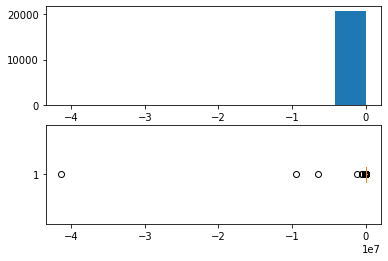

In [27]:
scr_eenv = Eeenv.score_samples(DFX0)
fig, ax = plt.subplots(2, 1)
ax[0].hist(scr_eenv)
ax[1].boxplot(scr_eenv, vert=False)

In [28]:
cutoff = np.quantile(scr_eenv, 0.02)
isin, nx = np.unique(scr_eenv > cutoff, return_counts=True)
cutoff, isin, nx, nx / len(scr_eenv)

(-888.0941243654976,
 array([False,  True]),
 array([  413, 20227]),
 array([0.02000969, 0.97999031]))

In [29]:
iheenv = Eeenv.predict(DFX0)

from scipy.stats.contingency import crosstab
crosstab(scr_eenv > cutoff, iheenv)

((array([False,  True]), array([-1,  1])),
 array([[  413,     0],
        [    0, 20227]]))

In [30]:
DFX0.iloc[iheenv < 0]   # 413

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
91,-122.28,37.80,52.0,215.0,87.0,904.0,88.0,0.8668,137500.0,2.443182,0.404651,10.272727
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,2.294016,0.464815,1.493328
106,-122.96,38.26,20.0,1982.0,358.0,308.0,132.0,3.1429,240900.0,15.015152,0.180626,2.333333
158,-116.39,33.69,10.0,11659.0,2007.0,2186.0,1083.0,6.9833,238800.0,10.765466,0.172142,2.018467
307,-122.70,39.00,18.0,793.0,148.0,186.0,59.0,2.3125,162500.0,13.440678,0.186633,3.152542
...,...,...,...,...,...,...,...,...,...,...,...,...
20340,-118.59,34.18,7.0,11853.0,2691.0,4404.0,2447.0,4.2009,271300.0,4.843890,0.227031,1.799755
20414,-118.27,34.05,37.0,350.0,245.0,1122.0,248.0,2.7634,137500.0,1.411290,0.700000,4.524194
20426,-122.08,37.84,17.0,1320.0,159.0,1722.0,141.0,11.7064,500001.0,9.361702,0.120455,12.212766
20442,-118.55,34.44,14.0,15348.0,2366.0,7087.0,2169.0,6.3277,237700.0,7.076072,0.154157,3.267404


### Isolation Forest

- sklearn.ensemble.IsolationForest(n_estimators=100, max_features=1, contamination=0.1, ...)
- 각 샘플에 대하여 Isolation Forest(랜덤으로 고른 변수를 랜덤으로 분리하는 랜덤포레스트)를 적합했을 때 나무들의 깊이의 평균 이용
- 이상치는 나무의 초기 분리에 나타나므로 평균깊이가 작을수록 이상치일 가능성이 높음

In [31]:
# Isolation Forest
seed = 1775
Eisof = IsolationForest(contamination=0.02, random_state=seed)
Eisof.fit(DFX0)

/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, random_state=1775)

{'whiskers': [<matplotlib.lines.Line2D at 0x15b68a380>,
 'caps': [<matplotlib.lines.Line2D at 0x15b68a920>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b68a0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x15b68aec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b68b190>],
 'means': []}

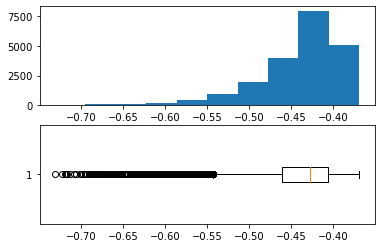

In [32]:
# 정상치 점수 : 점수가 높을수록 inlier, 점수가 낮을수록 outlier
scr_isof = Eisof.score_samples(DFX0)
fig, ax = plt.subplots(2, 1)
ax[0].hist(scr_isof)
ax[1].boxplot(scr_isof, vert=False)

In [33]:
cutoff = np.quantile(scr_isof, 0.02)
isin, nx = np.unique(scr_isof > cutoff, return_counts=True)
cutoff, isin, nx, nx / len(scr_isof)

(-0.578621018472628,
 array([False,  True]),
 array([  413, 20227]),
 array([0.02000969, 0.97999031]))

In [34]:
ihisof = Eisof.predict(DFX0)
crosstab(scr_isof > cutoff, ihisof)

((array([False,  True]), array([-1,  1])),
 array([[  413,     0],
        [    0, 20227]]))

In [35]:
DFX0.iloc[ihisof < 0]   # 413

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
91,-122.28,37.80,52.0,215.0,87.0,904.0,88.0,0.8668,137500.0,2.443182,0.404651,10.272727
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,2.294016,0.464815,1.493328
117,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,141000.0,6.794212,0.167250,3.659164
158,-116.39,33.69,10.0,11659.0,2007.0,2186.0,1083.0,6.9833,238800.0,10.765466,0.172142,2.018467
212,-122.04,37.39,5.0,8745.0,2211.0,3959.0,2019.0,4.7685,280100.0,4.331352,0.252830,1.960872
...,...,...,...,...,...,...,...,...,...,...,...,...
20442,-118.55,34.44,14.0,15348.0,2366.0,7087.0,2169.0,6.3277,237700.0,7.076072,0.154157,3.267404
20463,-117.31,33.19,11.0,20944.0,3753.0,8738.0,3441.0,4.3762,215500.0,6.086603,0.179192,2.539378
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,4.803493,0.211023,3.455240
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,5.148007,0.217481,2.899491


### Local Outlier Factor

- sklearn.neighbors.LocalOutlierFactor(n_neighbors=20, contamination, novelty=False, ...)
- kNN 기준으로 샘플의 확률밀도 함수와 그 샘플의 이웃들의 확률밀도함수를 비교
- 이상치는 본인의 밀도가 이웃의 밀도보다 낮음
- LOF가 1보다 크면 이상치일 가능성이 높음
- novelty=False면 score_samples 사용 불가. 예측하려면 fit_predict() 사용
- novelty=True면 predict, scord_samples 사용가능하지만 특이치 포착에 사용할 것. TR에 사용금지

In [36]:
Elof = LocalOutlierFactor(contamination=0.02, novelty=False)
Elof.fit(DFX0)

LocalOutlierFactor(contamination=0.02)

In [37]:
ihlof = Elof.fit_predict(DFX0)
isin, nx = np.unique(ihlof, return_counts=True)
isin, nx, nx / len(ihlof)

(array([-1,  1]), array([  413, 20227]), array([0.02000969, 0.97999031]))

## 이상치 모형결과 비교

In [38]:
DF0in = DFX0[['median_house_value']].copy()
DF0in.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [39]:
# 예측값 : {1: inlier, -1: outlier}
DF0in['ihonesvm'] = Eonesvm.predict(DFX0)
DF0in['iheenv'] = Eeenv.predict(DFX0)
DF0in['ihisof'] = Eisof.predict(DFX0)
DF0in['ihlof'] = Elof.fit_predict(DFX0)
DF0in['iscore'] = DF0in['ihonesvm'] + DF0in['iheenv'] + DF0in['ihisof'] + DF0in['ihlof']
DF0in['isoutlier'] = DF0in['iscore'] <= -4 # 4개 모두 이상치로 판단하면 이상치로 간주하기
DF0in.head()

,median_house_value,ihonesvm,iheenv,ihisof,ihlof,iscore,isoutlier
0,452600.0,1,1,1,1,4,False
1,358500.0,1,1,1,1,4,False
2,352100.0,1,1,1,1,4,False
3,341300.0,1,1,1,1,4,False
4,342200.0,1,1,1,1,4,False


In [40]:
DF0in.drop(['median_house_value', 'iscore', 'isoutlier'], axis=1).apply(pd.Series.value_counts)

,ihonesvm,iheenv,ihisof,ihlof
1,20227,20227,20227,20227
-1,413,413,413,413


In [41]:
DF0in['iscore'].value_counts(), DF0in['iscore'].value_counts(normalize=True)

( 4    19512
  2      763
  0      229
 -2      113
 -4       23
 Name: iscore, dtype: int64,
  4    0.945349
  2    0.036967
  0    0.011095
 -2    0.005475
 -4    0.001114
 Name: iscore, dtype: float64)

In [42]:
DFX0.loc[DF0in['isoutlier']==True]  # 4개 이상의 모형이 이상치로 판단된 23개 샘플

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
2728,-122.42,37.78,26.0,812.0,507.0,628.0,445.0,2.3304,500001.0,1.824719,0.624384,1.411236
4023,-117.64,33.87,2.0,17470.0,2727.0,5964.0,1985.0,6.2308,257900.0,8.801008,0.156096,3.004534
4114,-118.52,34.17,20.0,17377.0,4457.0,7450.0,4204.0,3.2154,259600.0,4.133444,0.256488,1.772122
5690,-117.18,32.95,4.0,19001.0,2688.0,8980.0,2441.0,6.3237,260900.0,7.784105,0.141466,3.678820
6170,-118.67,34.16,17.0,16544.0,2206.0,6214.0,2118.0,9.1228,500001.0,7.811143,0.133341,2.933900
6410,-122.06,37.40,21.0,12855.0,3226.0,7273.0,3052.0,4.3351,267400.0,4.211992,0.250953,2.383028
6959,-118.88,34.02,19.0,15990.0,2611.0,5175.0,2173.0,7.7848,500001.0,7.358491,0.163290,2.381500
7530,-117.75,34.01,4.0,22128.0,3522.0,10450.0,3258.0,6.1287,289600.0,6.791897,0.159165,3.207489
11271,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0,6.042193,0.172904,2.748105
11411,-116.36,33.78,6.0,24121.0,4522.0,4176.0,2221.0,3.3799,239300.0,10.860423,0.187471,1.880234


In [43]:
DFX0.loc[DF0in['iscore'] <= -2, :]  # 3개 이상의 모형이 이상치로 판단된 135개의 샘플

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
998,-122.31,37.50,22.0,14034.0,3020.0,6266.0,2952.0,4.3939,491200.0,4.754065,0.215192,2.122629
1174,-117.29,33.97,4.0,18767.0,3032.0,8805.0,2723.0,4.6667,160600.0,6.892031,0.161560,3.233566
1385,-121.86,37.37,15.0,8162.0,2124.0,8793.0,2086.0,3.3306,210300.0,3.912752,0.260230,4.215244
1745,-116.94,34.24,27.0,12342.0,2630.0,1300.0,566.0,1.9980,153500.0,21.805654,0.213094,2.296820
1761,-118.29,34.06,42.0,3894.0,2293.0,6846.0,2156.0,1.5553,70000.0,1.806122,0.588855,3.175325
...,...,...,...,...,...,...,...,...,...,...,...,...
20180,-121.33,38.77,3.0,20214.0,3559.0,8361.0,3112.0,4.2259,169300.0,6.495501,0.176066,2.686697
20186,-117.86,33.99,10.0,17820.0,2812.0,8686.0,2666.0,6.3875,310700.0,6.684171,0.157800,3.258065
20340,-118.59,34.18,7.0,11853.0,2691.0,4404.0,2447.0,4.2009,271300.0,4.843890,0.227031,1.799755
20426,-122.08,37.84,17.0,1320.0,159.0,1722.0,141.0,11.7064,500001.0,9.361702,0.120455,12.212766


<AxesSubplot:>

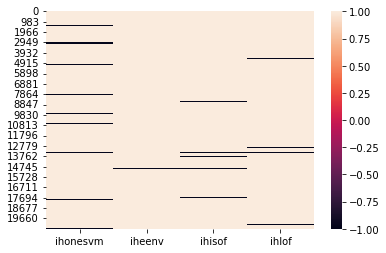

In [44]:
sns.heatmap(DF0in.iloc[:, 1:5])

<AxesSubplot:>

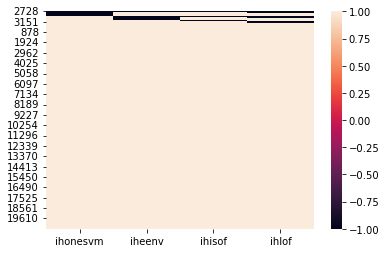

In [45]:
sns.heatmap(DF0in.iloc[:, 1:5].sort_values(by=['ihonesvm', 'iheenv', 'ihisof', 'ihlof']))

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

PTpca = make_pipeline(StandardScaler(), PCA(n_components=3))
DFX0pca = PTpca.fit_transform(DFX0)
DFX0pca = pd.DataFrame(DFX0pca, columns=['PC1', 'PC2', 'PC3'])
DFX0pca.head()

,PC1,PC2,PC3
0,-1.886752,3.516932,0.631688
1,3.087718,2.756259,1.375059
2,-1.801312,3.105434,0.921055
3,-1.817907,1.667638,1.078954
4,-1.684641,1.311992,1.259559


In [47]:
# 주성분별 분산설명력, 누적 분산설명력
PTpca['pca'].explained_variance_ratio_, np.cumsum(PTpca['pca'].explained_variance_ratio_)

(array([0.32575277, 0.19405771, 0.16021067]),
 array([0.32575277, 0.51981048, 0.68002115]))

In [48]:
DFX0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [49]:
# 주성분계수 (주의: row기준임)
np.round(PTpca['pca'].components_, 3) # age, capgain, caploss, hr

array([[ 0.074, -0.074, -0.219,  0.487,  0.487,  0.469,  0.489,  0.065,
         0.051,  0.019, -0.027, -0.003],
       [-0.147,  0.11 , -0.069,  0.086, -0.075, -0.093, -0.078,  0.572,
         0.432,  0.39 , -0.518, -0.006],
       [-0.667,  0.694, -0.001,  0.063,  0.07 ,  0.043,  0.07 , -0.163,
        -0.178,  0.013, -0.   , -0.001]])

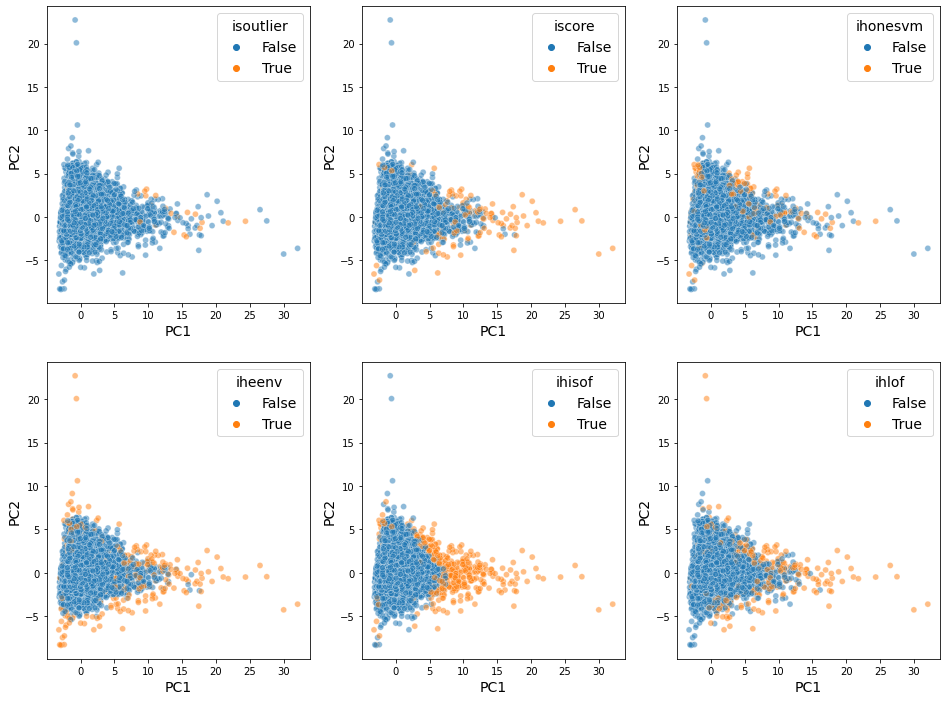

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
sns.scatterplot(x='PC1', y='PC2', hue=DF0in['isoutlier'], data=DFX0pca, ax=axs[0,0], alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', hue=DF0in['iscore']<=-2, data=DFX0pca, ax=axs[0,1], alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', hue=DF0in['ihonesvm']==-1, data=DFX0pca, ax=axs[0,2], alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', hue=DF0in['iheenv']==-1, data=DFX0pca, ax=axs[1,0], alpha=0.5)    # 동그라미 기준(구형편향)으로 잡아냄
sns.scatterplot(x='PC1', y='PC2', hue=DF0in['ihisof']==-1, data=DFX0pca, ax=axs[1,1], alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', hue=DF0in['ihlof']==-1, data=DFX0pca, ax=axs[1,2], alpha=0.5)
plt.show()

Text(0.5, 0, 'Z:PC3')

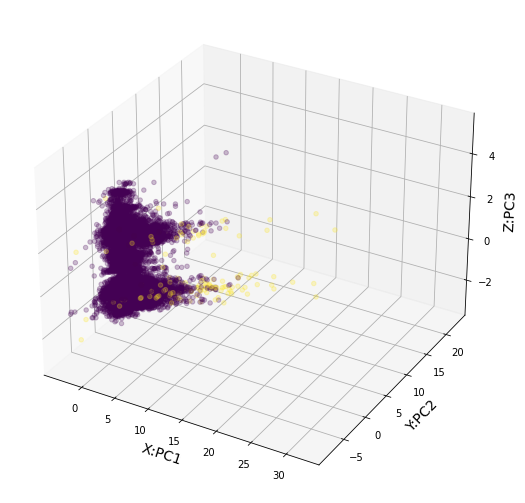

In [51]:
# 3D scatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (16, 9))
ax  = plt.axes(projection ='3d')
p   = ax.scatter3D(DFX0pca['PC1'], DFX0pca['PC2'], DFX0pca['PC3'], alpha=0.25, c=DF0in['iscore']<=-2)
ax.set_xlabel('X:PC1')
ax.set_ylabel('Y:PC2')
ax.set_zlabel('Z:PC3')

### 이상치 처리하기

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

connum = DF0.select_dtypes(include=[np.number]).drop('median_house_value', axis=1) # target이므로 drop

In [53]:
# 파이프라인 없이 순차처리
Timpmed = SimpleImputer(strategy='median')
connum = pd.DataFrame(Timpmed.fit_transform(connum), index=connum.index, columns=connum.columns)
connum.head()

Eisof = IsolationForest(random_state=42, contamination=0.05)
ih = Eisof.fit_predict(connum)
np.unique(ih, return_counts=True)

/opt/homebrew/Caskroom/miniforge/base/envs/pandas_info/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(array([-1,  1]), array([ 1032, 19608]))

In [54]:
DF0.iloc[ih!=1, :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_p_household,bedrooms_p_room,population_p_household
50,-122.27,37.82,21.0,896.0,453.0,735.0,438.0,0.9218,171900.0,NEAR BAY,2.045662,0.505580,1.678082
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,2.771930,0.272152,1.649123
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,1.714286,0.333333,2.571429
83,-122.28,37.81,52.0,386.0,164.0,346.0,155.0,0.8075,137500.0,NEAR BAY,2.490323,0.424870,2.232258
86,-122.27,37.81,40.0,880.0,451.0,582.0,380.0,0.9770,118800.0,NEAR BAY,2.315789,0.512500,1.531579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,-117.31,33.19,11.0,20944.0,3753.0,8738.0,3441.0,4.3762,215500.0,NEAR OCEAN,6.086603,0.179192,2.539378
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND,3.882852,0.265267,2.103565
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND,4.803493,0.211023,3.455240
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND,5.148007,0.217481,2.899491


In [55]:
WK = DF0.iloc[ih==1, :]
DF0.describe()  # 이상치 제거전

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [56]:
WK.describe() # 이상치 제거 후

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household
count,19608.000000,19608.000000,19608.000000,19608.000000,19403.000000,19608.000000,19608.000000,19608.000000,19608.000000,19608.000000,19403.000000,19608.000000
mean,-119.580197,35.633179,29.071501,2389.231334,488.504252,1306.431202,457.850928,3.844512,205596.601336,5.338510,0.211358,2.922555
std,1.993585,2.132242,12.295141,1385.565672,279.096380,756.173206,258.611716,1.819629,114380.001490,1.490283,0.051755,0.765013
min,-124.350000,32.540000,1.000000,15.000000,3.000000,8.000000,3.000000,0.499900,14999.000000,1.411290,0.100000,1.089286
25%,-121.800000,33.930000,19.000000,1446.000000,295.000000,786.000000,280.000000,2.574050,118800.000000,4.459316,0.175889,2.436085
50%,-118.500000,34.260000,29.000000,2092.000000,427.000000,1150.000000,403.000000,3.531300,178850.000000,5.219834,0.203115,2.818924
75%,-118.020000,37.710000,37.000000,3019.000000,619.000000,1659.000000,580.000000,4.715900,262900.000000,6.012973,0.238419,3.280111
max,-114.550000,41.950000,52.000000,10267.000000,1869.000000,6242.000000,1773.000000,15.000100,500001.000000,38.840909,0.700000,18.500000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'rooms_p_household'}>,
        <AxesSubplot:title={'center':'bedrooms_p_room'}>,
        <AxesSubplot:title={'center':'population_p_household'}>]],
      dtype=object)

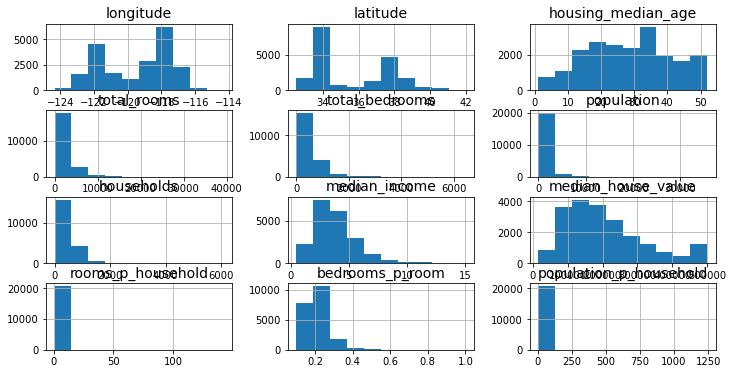

In [57]:
# 원자료 히스토그램
DF0.select_dtypes(include=np.number).hist(figsize=(12, 6))

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'rooms_p_household'}>,
        <AxesSubplot:title={'center':'bedrooms_p_room'}>,
        <AxesSubplot:title={'center':'population_p_household'}>]],
      dtype=object)

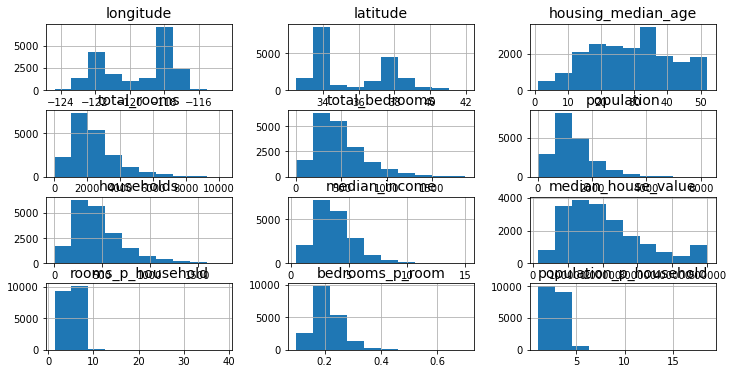

In [58]:
WK.select_dtypes(include=np.number).hist(figsize=(12, 6))

## 분할

### 범주형 데이터 One-hot Encoding 하기

In [59]:
one_hot = pd.get_dummies(DF0['ocean_proximity'])
DF0 = pd.concat([DF0, one_hot], axis=1)
DF0.drop(['ocean_proximity'], axis=1, inplace=True)

In [60]:
DF0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


In [61]:
# total_bedrooms과 bedrooms_p_room의 결측치를 열 평균으로 맞춰주기
DF0['total_bedrooms'].fillna(DF0['total_bedrooms'].median(), inplace=True)
DF0['bedrooms_p_room'].fillna(DF0['bedrooms_p_room'].median(), inplace=True)

# DFX0 = DFX0.dropna(subset=["total_bedrooms"]) # 옵션 1
# housing_ml.drop("total_bedrooms", axis=1) #옵션 2
# median = housing_ml["total_bedrooms"].median() #옵션 3
# housing_ml["total_bedrooms"].fillna(median, inplace=True)

In [62]:
X, y = DF0.drop(['median_house_value'], axis=1), DF0['median_house_value']

In [63]:
# train, test 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1775)

- 결측값 확인

In [64]:
nmiss = X_train.isna().sum()
pmiss = nmiss / X_train.shape[0]
pd.concat([nmiss, pmiss], axis=1).rename(columns={'0': nmiss, 1: 'pmiss'})

,0,pmiss
longitude,0,0.0
latitude,0,0.0
housing_median_age,0,0.0
total_rooms,0,0.0
total_bedrooms,0,0.0
population,0,0.0
households,0,0.0
median_income,0,0.0
rooms_p_household,0,0.0
bedrooms_p_room,0,0.0


<AxesSubplot:>

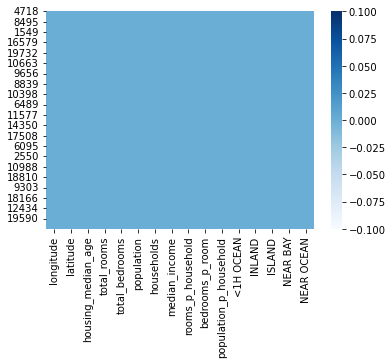

In [65]:
# 결측 분포 확인
sns.heatmap(X_train.isna(), cmap='Blues')

## 전처리

- 모든 숫자 변수는 중위수 대체 후 표준화
- 모든 범주형 변수는 최빈값 대체 후 가변수화

In [66]:
def monkey_patch_get_signature_names_out():
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feture_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
        print("Monkey-patching SimpleImputer.get_feature_names_out()")
        SimpleImputer.get_feature_names_out = default_get_feture_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].reature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("features_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if self.feature_names_out is None:
                return default_get_feture_names_out(self, names)
            elif callable(self.feature_names_out):
                return self.feature_names_out(names)
            else:
                return self.feature_names_out

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

In [67]:
monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()


## Pipeline - make_pipeline, make_column_transformer

In [68]:
catx = X_train.select_dtypes('category').columns
numx = X_train.select_dtypes('number').columns

In [69]:
from sklearn.preprocessing import OneHotEncoder

# 수치형 변수 공통
pnum = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

# 범주형 변수 공통
pcat = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [70]:
from sklearn.compose import make_column_transformer, make_column_selector

# 컬럼 결합
pp = make_column_transformer(
    (pnum, make_column_selector(dtype_include=np.number)),
    (pcat, make_column_selector(dtype_include='category'))
)

TRX_prep = pp.fit_transform(X_train)
TRX_prep[:5, :]

array([[-0.13382775,  0.56705481, -1.32096177, -0.10808828, -0.58843799,
        -0.4918016 , -0.63173499,  2.58723652,  1.67599719, -1.57895868,
         0.02506221, -0.89654984,  1.47512555, -0.01348032, -0.35423954,
        -0.38286687],
       [ 0.08078463,  0.33751537, -0.68663274, -0.40844421, -0.4687369 ,
        -0.02954866, -0.42725408, -0.86974938, -0.10020575, -0.30862263,
         0.09761681, -0.89654984,  1.47512555, -0.01348032, -0.35423954,
        -0.38286687],
       [ 1.16881947, -1.32547449, -0.05230372,  0.3440555 ,  0.91500767,
         0.37305873,  0.91760112, -0.4437358 , -0.62341594,  1.00600411,
        -0.08186314, -0.89654984, -0.6779084 , -0.01348032, -0.35423954,
         2.61187392],
       [ 0.984153  , -0.74928364, -1.00379726, -0.52067522, -0.72729125,
        -0.44355889, -0.68154445,  0.89611411,  0.36968483, -1.00008545,
         0.07050762, -0.89654984,  1.47512555, -0.01348032, -0.35423954,
        -0.38286687],
       [ 0.99912596, -0.81955081,  0

In [71]:
pp

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15c8d0610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15ca54490>)])

In [72]:
pp.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-1__rooms_p_household', 'pipeline-1__bedrooms_p_room',
       'pipeline-1__population_p_household', 'pipeline-1__<1H OCEAN',
       'pipeline-1__INLAND', 'pipeline-1__ISLAND', 'pipeline-1__NEAR BAY',
       'pipeline-1__NEAR OCEAN'], dtype=object)

In [73]:
# ColumnTransformer의 원소는 named_transformers_로만 접근 가능
pp.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])}

In [74]:
pp.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [75]:
pnum.named_steps['standardscaler']

StandardScaler()

In [76]:
pcat[1]

OneHotEncoder(handle_unknown='ignore')

## 예측모형

### lm: LinearRegression

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

PElm = make_pipeline(pp, LinearRegression())

In [78]:
# fit and score
PElm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c8d0610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                 

In [79]:
PElm.score(X_train, y_train), PElm.score(X_test, y_test)

(0.6498708192897373, 0.669220819445913)

In [80]:
# predict
PElm.predict(X_train)[:5]

array([320500.82364739,  56652.82364739, 235549.42314655, 199436.82364739,
       112276.82364739])

### CVMETlm

In [81]:
from sklearn.model_selection import cross_validate, cross_val_score

cross_val_score(PElm, X_train, y_train, scoring='r2', cv=5), -cross_val_score(PElm, X_train, y_train, scoring='neg_root_mean_squared_error')

(array([0.64451606, 0.66693599, 0.63275526, 0.64266285, 0.6453163 ]),
 array([68954.62699693, 67337.54347895, 69261.67076085, 68844.54083486,
        68283.43027482]))

In [83]:
# 다수 지표 한번에 계산
scr = {
        'mse': 'neg_mean_squared_error',
        'rmse': 'neg_root_mean_squared_error',
        'mae': 'neg_mean_absolute_error',
        'mape': 'neg_mean_absolute_percentage_error',
        'r2': 'r2',
       }

CV = cross_validate(PElm, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CV.filter(regex='test')

,test_mse,test_rmse,test_mae,test_mape,test_r2
0,4.754741e+09,68954.626997,49283.677035,0.278036,0.644516
1,4.534345e+09,67337.543479,48884.416234,0.283818,0.666936
2,4.797179e+09,69261.670761,48663.389393,0.280454,0.632755
3,4.739571e+09,68844.540835,49926.159066,0.289817,0.642663
4,4.662627e+09,68283.430275,49280.497576,0.291977,0.645316


In [84]:
CVMETlm = CV.filter(regex='test').mean()
CVMET = CVMETlm.to_frame(name='lm').T
CVMET

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.697692e+09,68536.362469,49207.627861,0.28482,0.646437


In [85]:
TROUT = pd.DataFrame(y_train.copy())
TROUT['yhlm'] = PElm.predict(X_train)
TSOUT = pd.DataFrame(y_test.copy())
TSOUT['yhlm'] = PElm.predict(X_test)
TSOUT.head()

,median_house_value,yhlm
16040,99100.0,149364.823647
9617,120800.0,167252.823647
14174,345700.0,384685.423147
4999,207300.0,278580.823647
10362,179800.0,226484.823647


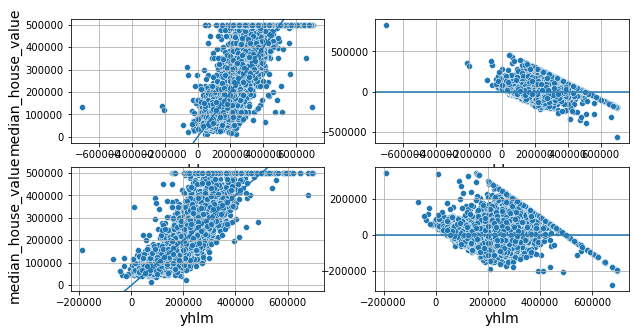

In [86]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
g = sns.scatterplot(x='yhlm', y='median_house_value', data=TROUT, ax=axs[0, 0])
g.axline((140, 140), slope=1)
g.grid()

g = sns.scatterplot(x=TROUT['yhlm'], y=TROUT['median_house_value']-TROUT['yhlm'], ax=axs[0, 1])
g.axhline(0)
g.grid()

g = sns.scatterplot(x='yhlm', y='median_house_value', data=TSOUT, ax=axs[1, 0])
g.axline((140, 140), slope=1)
g.grid()

g = sns.scatterplot(x=TSOUT['yhlm'], y=TSOUT['median_house_value'] - TSOUT['yhlm'], ax=axs[1, 1])
g.axhline(0)
g.grid()

In [87]:
# 평가지표 계산함수
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def metreg(y, yh, modelname=None):
    rmse = mean_squared_error(y, yh, squared=False)
    mse = rmse**2
    mae = mean_absolute_error(y, yh)
    mape = mean_absolute_percentage_error(y, yh)
    r2 = r2_score(y, yh)
    metrics = {
        'mse': rmse**2,
        'rmse': rmse,
        'mae': mean_absolute_error(y, yh),
        'mape': mean_absolute_percentage_error(y, yh),
        'r2': r2_score(y, yh)
    }

    if modelname != None:
        return pd.DataFrame(metrics, index=[modelname])
    return metrics.abs()

TRMET = metreg(TROUT['median_house_value'], TROUT['yhlm'], modelname='TRlm')
TSMET = metreg(TSOUT['median_house_value'], TSOUT['yhlm'], modelname='TSlm')

In [88]:
TSMET

,mse,rmse,mae,mape,r2
TSlm,4.431955e+09,66572.933514,48470.823472,0.283085,0.669221


## RandomForestRegressor

### PErf: base

In [89]:
from sklearn.ensemble import RandomForestRegressor

PErf = make_pipeline(pp, RandomForestRegressor(random_state=1775, max_depth=4, max_features='sqrt'))
PErf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c8d0610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                 

In [90]:
PErf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15c8d0610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                 

In [91]:
PErf.fit(X_train, y_train)
PErf.score(X_train, y_train), PErf.score(X_test, y_test)

(0.6271038073610845, 0.6335819008057235)

In [92]:
cross_val_score(PErf, X_train, y_train, scoring='r2', cv=5), -cross_val_score(PErf, X_train, y_train, scoring='neg_root_mean_squared_error')

(array([0.60849681, 0.63144026, 0.62282987, 0.62187433, 0.62038678]),
 array([72363.75154308, 70834.91210319, 70191.38584143, 70818.78971572,
        70642.38907909]))

In [93]:
CV = cross_validate(PErf, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETrf = CV.filter(regex='test').mean()
CVMETrf = CVMETrf.to_frame(name='rf').T
CVMET = pd.concat([CVMET, CVMETrf], axis=0)
CVMET

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.697692e+09,68536.362469,49207.627861,0.284820,0.646437
rf,5.037315e+09,70970.245657,52627.365891,0.322135,0.621006


### GSrf: GridSearchCV

In [94]:
PErf = make_pipeline(pp, RandomForestRegressor(random_state=1775))
PErf = Pipeline([('pp', pp), ('rf', RandomForestRegressor(random_state=1775))])
PErf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pp', 'rf', 'pp__n_jobs', 'pp__remainder', 'pp__sparse_threshold', 'pp__transformer_weights', 'pp__transformers', 'pp__verbose', 'pp__verbose_feature_names_out', 'pp__pipeline-1', 'pp__pipeline-2', 'pp__pipeline-1__memory', 'pp__pipeline-1__steps', 'pp__pipeline-1__verbose', 'pp__pipeline-1__simpleimputer', 'pp__pipeline-1__standardscaler', 'pp__pipeline-1__simpleimputer__add_indicator', 'pp__pipeline-1__simpleimputer__copy', 'pp__pipeline-1__simpleimputer__fill_value', 'pp__pipeline-1__simpleimputer__missing_values', 'pp__pipeline-1__simpleimputer__strategy', 'pp__pipeline-1__simpleimputer__verbose', 'pp__pipeline-1__standardscaler__copy', 'pp__pipeline-1__standardscaler__with_mean', 'pp__pipeline-1__standardscaler__with_std', 'pp__pipeline-2__memory', 'pp__pipeline-2__steps', 'pp__pipeline-2__verbose', 'pp__pipeline-2__simpleimputer', 'pp__pipeline-2__onehotencoder', 'pp__pipeline-2__simpleimputer__add_indicator', 'pp__pipeline-2__simpleimpute

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {'rf__max_features': ['auto', 'sqrt', 'log2'], 'rf__n_estimators': [50, 100, 200]}

GSrf = GridSearchCV(PErf, param_grid, cv=5)
%time GSrf.fit(X_train, y_train)
GSrf.score(X_train, y_train), GSrf.score(X_test, y_test)

CPU times: user 3min 23s, sys: 2.03 s, total: 3min 25s
Wall time: 3min 28s


(0.9754732825316245, 0.8250767374258415)

In [96]:
GSrf.best_params_

{'rf__max_features': 'sqrt', 'rf__n_estimators': 200}

In [97]:
tmp = pd.DataFrame(GSrf.cv_results_)
tmp.loc[:, ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.806032,0.003883,9
1,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.808372,0.004293,8
2,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.809494,0.004587,7
3,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.811768,0.001343,5
4,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.814517,0.001642,3
5,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.816775,0.001485,1
6,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.811768,0.001343,5
7,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.814517,0.001642,3
8,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.816775,0.001485,1


In [98]:
# 특정 평가지표 계산
cross_val_score(GSrf.best_estimator_, X_train, y_train, scoring='r2', cv=5), -cross_val_score(GSrf.best_estimator_, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)

(array([0.81573812, 0.81593313, 0.81568054, 0.81691349, 0.81960823]),
 array([49644.50430572, 50058.89147449, 49068.27201168, 49278.6270092 ,
        48697.09695798]))

In [99]:
CV = cross_validate(GSrf.best_estimator_, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETrfg = CV.filter(regex='test').mean()
CVMETrfg = CVMETrfg.to_frame(name='rfg').T
CVMET = pd.concat([CVMET, CVMETrfg], axis=0)
CVMET

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.697692e+09,68536.362469,49207.627861,0.284820,0.646437
rf,5.037315e+09,70970.245657,52627.365891,0.322135,0.621006
rfg,2.435591e+09,49349.478352,33003.495623,0.185462,0.816775


### RSrf = RandomizedSearchCV(PErf, param_dist)

In [100]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__n_estimators': [50, 100, 200]}
param_dist = {'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__n_estimators': randint(low=50, high=200)}

RSrf = RandomizedSearchCV(PErf, param_distributions=param_dist, n_iter=10, cv=5, random_state=1775)
%time RSrf.fit(X_train, y_train)
RSrf.score(X_train, y_train), RSrf.score(X_test, y_test)

CPU times: user 3min 52s, sys: 2.18 s, total: 3min 54s
Wall time: 3min 56s


(0.9754650765324266, 0.8250392450687254)

In [101]:
RSrf.best_params_

{'rf__max_features': 'sqrt', 'rf__n_estimators': 189}

In [102]:
tmp = pd.DataFrame(RSrf.cv_results_)
tmp.loc[:, ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.815989,0.001256,4
1,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.816252,0.001265,3
2,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.814154,0.001648,8
3,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.809486,0.004612,9
4,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.814768,0.001608,7
5,"{'rf__max_features': 'auto', 'rf__n_estimators...",0.808810,0.004091,10
6,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.816625,0.001425,2
7,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.815184,0.001254,6
8,"{'rf__max_features': 'sqrt', 'rf__n_estimators...",0.816684,0.001387,1
9,"{'rf__max_features': 'log2', 'rf__n_estimators...",0.815989,0.001256,4


In [103]:
# 특정 평가지표 계산
cross_val_score(RSrf.best_estimator_, X_train, y_train, scoring='r2', cv=5), -cross_val_score(RSrf.best_estimator_, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)

(array([0.8157181 , 0.81610497, 0.81564038, 0.81657893, 0.81937733]),
 array([49647.20042722, 50035.51853874, 49073.61814858, 49323.62992237,
        48728.25305001]))

In [104]:
CV = cross_validate(RSrf.best_estimator_, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETrfr = CV.filter(regex='test').mean()
CVMETrfr = CVMETrfr.to_frame(name='rfg').T
CVMET = pd.concat([CVMET, CVMETrfg], axis=0)
CVMET

,test_mse,test_rmse,test_mae,test_mape,test_r2
lm,4.697692e+09,68536.362469,49207.627861,0.284820,0.646437
rf,5.037315e+09,70970.245657,52627.365891,0.322135,0.621006
rfg,2.435591e+09,49349.478352,33003.495623,0.185462,0.816775
rfg,2.435591e+09,49349.478352,33003.495623,0.185462,0.816775


## OPrf: OPtuna 튜닝

In [105]:
!pip install optuna

In [106]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 목적함수 정의
param_grid = {'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__n_estimators': [50, 100, 200]}
param_dist = {'rf__max_features': ['auto', 'sqrt', 'log2'],
              'rf__n_estimators': randint(low=50, high=200)}

def objective(trial):
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    n_estimators = trial.suggest_int('n_estimators', 50, 200)

    PErf = Pipeline([('pp', pp),
                     ('rf', RandomForestRegressor(random_state=1775,
                                                  max_features=max_features,
                                                  n_estimators=n_estimators))])
    cvr2 = cross_val_score(PErf, X_train, y_train, cv=10)
    return cvr2.mean()

study = optuna.create_study(direction='maximize')
%time study.optimize(objective, n_trials=20)

[I 2022-10-09 23:40:37,224] A new study created in memory with name: no-name-ba72259e-4edc-4382-84e3-573c336b6654
[I 2022-10-09 23:41:13,174] Trial 0 finished with value: 0.8199067802015358 and parameters: {'max_features': 'log2', 'n_estimators': 155}. Best is trial 0 with value: 0.8199067802015358.
[I 2022-10-09 23:41:36,726] Trial 1 finished with value: 0.8194651406799034 and parameters: {'max_features': 'sqrt', 'n_estimators': 101}. Best is trial 0 with value: 0.8199067802015358.
[I 2022-10-09 23:43:39,904] Trial 2 finished with value: 0.810880659186866 and parameters: {'max_features': 'auto', 'n_estimators': 156}. Best is trial 0 with value: 0.8199067802015358.
[I 2022-10-09 23:44:25,765] Trial 3 finished with value: 0.8200738408331263 and parameters: {'max_features': 'log2', 'n_estimators': 193}. Best is trial 3 with value: 0.8200738408331263.
[I 2022-10-09 23:44:54,525] Trial 4 finished with value: 0.8195757671891334 and parameters: {'max_features': 'sqrt', 'n_estimators': 121}. 

In [ ]:

OPrf = Pipeline([
    ('pp', pp),
    ('rf', RandomForestRegressor(random_state=1775, n_jobs=2, max_features=study.best_params['max_features'],
                                 n_estimators=study.best_params['n_estimators']))
])
OPrf.fit(X_train, y_train)
OPrf.score(X_train, y_train), OPrf.score(X_test, y_test)

In [ ]:
# 목적함수값, 튜닝된 모수값
study.best_value, study.best_params

In [ ]:
# 모수조합별 r2
study.trials_dataframe().sort_values(by='value', ascending=False).head()

In [ ]:
from optuna.visualization import plot_optimization_history, plot_slice

plot_optimization_history(study)

In [ ]:
# 모수별 obj(r2) 값
plot_slice(study)

In [ ]:
cross_val_score(OPrf, X_train, y_train, scoring='r2', cv=5), -cross_val_score(OPrf, X_train, y_train, scoring='neg_root_mean_squared_error')

In [ ]:
CV = cross_validate(OPrf, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETrfo = CV.filter(regex='test').mean()
CVMETrfo = CVMETrfo.to_frame(name='rfo').T
CVMET = pd.concat([CVMET, CVMETrfo], axis=0)
CVMET

In [ ]:
# rf 최종모형 예측값 저장 (GS튜닝결과 선택)
TROUT['yhrfg'] = GSrf.predict(X_train)
TSOUT['yhrfg'] = GSrf.predict(X_test)
TSOUT.head()

In [ ]:
TRMET = pd.concat([TRMET, metreg(TROUT['median_house_value'], TROUT['yhrfg'], modelname='TRrfg')])
TSMET = pd.concat([TSMET, metreg(TSOUT['median_house_value'], TSOUT['yhrfg'], modelname='TSrfg')])
TSMET

### lgb: light gbm

In [ ]:
import lightgbm as lgb

PElgb = make_pipeline(pp, lgb.LGBMRegressor(random_state=1775))

In [ ]:
PElgb = Pipeline([('pp', pp), ('lgb', lgb.LGBMRegressor(random_state=1775))])
PElgb.get_params().keys()

In [ ]:
PElgb.fit(X_train, y_train)
PElgb.score(X_train, y_train), PElgb(X_test, y_test)

In [ ]:
cross_val_score(PElgb, X_train, y_train, scoring='r2', cv=5), -cross_val_score(PElgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)

In [ ]:
CV = cross_validate(PElgb, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETlgb = CV.filter(regex='test').mean()
CVMETlgb = CVMETlgb.to_frame(name='lgb').T
CVMET = pd.concat([CVMET, CVMETlgb], axis=0)
CVMET

### GSlgb

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'lgb__num_leaves': [50, 100, 200],
              'lgb__min_child_samples': [1, 10, 20],
              'lgb__max_depth': [-1, 10, 20],
              'lgb__learning_rate': [0.1, 0.2, 0.3],
              'lgb__reg_alpha': [0, 0.01, 0.02]
              }

GSlgb = GridSearchCV(PElgb, param_grid, cv=5)
%time GSlgb.fit(X_train, y_train)
GSlgb.score(X_train, y_train), GSlgb(X_test, y_test)

In [ ]:
GSlgb.best_params_

In [ ]:
cross_val_score(GSlgb.best_estimator_, X_train, y_train, scoring='r2', cv=5), -cross_val_score(GSlgb.best_estimator_, X_train, y_train, scoring='neg_root_mean_squared_error')

In [ ]:
CV = cross_validate(GSlgb.best_estimator_, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETlgbg = CV.filter(regex='test').mean()
CVMETlgbg = CVMETlgbg.to_frame(name='lgbg').T
CVMET = pd.concat([CVMET, CVMETlgbg], axis=0)
CVMET

### RSlgb

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random

param_grid = {'lgb__num_leaves': [50, 100, 200],
              'lgb__min_child_samples': [1, 10, 20],
              'lgb__max_depth': [-1, 10, 20],
              'lgb__learning_rate': [0.1, 0.2, 0.3],
              'lgb__reg_alpha': [0, 0.01, 0.02]
              }

param_dist = {'lgb__num_leaves': [50, 100, 200],
              'lgb__min_child_samples': [1, 10, 20],
              'lgb__max_depth': [-1, 10, 20],
              'lgb__learning_rate': [0.1, 0.2, 0.3],
              'lgb__reg_alpha': [0, 0.01, 0.02]
              }

RSlgb = RandomizedSearchCV(PElgb, param_distributions=param_dist, n_iter=10, cv=5, random_state=1775)
%time RSlgb.fit(X_train, y_train)
RSlgb.score(X_train, y_train), RSlgb.score(X_test, y_test)

In [ ]:
RSlgb.best_params_

In [ ]:
tmp = pd.DataFrame(RSlgb.cv_results_)
tmp.loc[:, ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [ ]:
cross_val_score(RSlgb.best_estimator_, X_train, y_train, scoring='r2', cv=5), -cross_val_score(RSlgb.best_estimator_, X_train, y_train, scoring='neg_root_mean_squared_error')

In [ ]:
CV = cross_validate(RSlgb.best_estimator_, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETlgbr = CV.filter(regex='test').mean()
CVMETlgbr = CVMETlgbr.to_frame(name='lgbr').T
CVMET = pd.concat([CVMET, CVMETlgbr], axis=0)
CVMET

### OPlgb: Optuna

In [ ]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 목적함수 정의
param_dist = {'lgb__num_leaves': [50, 100, 200],
              'lgb__min_child_samples': [1, 10, 20],
              'lgb__max_depth': [-1, 10, 20],
              'lgb__learning_rate': [0.1, 0.2, 0.3],
              'lgb__reg_alpha': [0, 0.01, 0.02]
              }

def objective(trial):
    num_leaves = trial.suggest_int('num_leaves', 50, 200)
    min_child_samples = trial.suggest_int('min_child_samples', 1, 20)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.3)
    reg_alpha = trial.suggest_uniform('reg_alpha', 0, 0.02)
    n_estimators = trial.sugget_int('n_estimators', 50, 200)

    PElgb = Pipeline([('pp', pp),
                     ('lgb', lgb.LGBMRegressor(random_state=1775,
                                              num_leaves=num_leaves,
                                               min_child_samples=min_child_samples,
                                               max_depth=max_depth,
                                               learning_rate=learning_rate,
                                               reg_alpha=reg_alpha,
                                              n_estimators=n_estimators))])
    cvr2 = cross_val_score(PElgb, X_train, y_train, cv=10)
    return cvr2.mean()

study = optuna.create_study(direction='maximize')
%time study.optimize(objective, n_trials=20)

In [ ]:
OPlgb = Pipeline([('pp', pp),
                  ('lgb', lgb.LGBMRegressor(random_state=1775,
                                            num_leaves=study.best_params['num_leaves'],
                                            min_child_samples=study.best_params['min_child_samples'],
                                            max_depth=study.best_params['max_depth'],
                                            learning_rate=study.best_params['learning_rate'],
                                            reg_alpha=study.best_params['reg_alpha'],
                                            n_estimators=study.best_params['n_estimators'],
                                            ))])
OPlgb.fit(X_train, y_train)
OPlgb.score(X_train, y_train), OPlgb.score(X_test, y_test)

In [ ]:
study.best_value, study.best_params

In [ ]:
from optuna.visualization import plot_optimization_history, plot_slice

plot_optimization_history(study)

In [ ]:
plot_slice(study)

In [ ]:
cross_val_score(OPlgb, X_train, y_train, scoring='r2', cv=5), -cross_val_score(OPlgb, X_train, y_train, scoring='neg_root_mean_squared_error')

In [ ]:
CV = cross_validate(OPlgb, X_train, y_train, scoring=scr, cv=5)
CV = pd.DataFrame(CV).abs()
CVMETlgbo = CV.filter(regex='test').mean()
CVMETlgbo = CVMETlgbo.to_frame(name='lgbo').T
CVMET = pd.concat([CVMET, CVMETlgbo], axis=0)
CVMET

In [ ]:
# rf 최종모형 예측값 저장 (GS튜닝결과 선택)
TROUT['yhlgbo'] = OPlgb.predict(X_train)
TSOUT['yhlgbo'] = OPlgb.predict(X_test)
TSOUT.head()

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))
g = sns.scatterplot(x='yhlgbo', y='median_house_value', data=TROUT, ax=axs[0, 0])
g.axline((140, 140), slope=1)
g.grid()

g = sns.scatterplot(x=TROUT['yhlgbo'], y=TROUT['median_house_value']-TROUT['yhlgbo'], ax=axs[0, 1])
g.axhline(0)
g.grid()

g = sns.scatterplot(x='yhlgbo', y='median_house_value', data=TSOUT, ax=axs[1, 0])
g.axline((140, 140), slope=1)
g.grid()

g = sns.scatterplot(x=TSOUT['yhlgbo'], y=TSOUT['median_house_value'] - TSOUT['yhlgbo'], ax=axs[1, 1])
g.axhline(0)
g.grid()